# 匯入數據

In [ ]:
# Mount my Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Bidirectional, Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/Jeff/result_df_gmt8.csv')
df

,Unnamed: 0,1A,1B,1C,1D,2A,2B,2C,2D,3A,...,10C,10D,11A,11B,11C,11D,12A,12B,12C,12D
0,書籍及雜誌期刊,153260,254754,1033464,3311299,294581,1611421,1923956,3217424,828160,...,15607166,15163880,2471786,2886779,5638008,16078053,1359165,1484627,12911216,15951674
1,美食、伴手禮,4003524,1550611,11988327,60221655,504455,2378925,4102485,15233428,6373156,...,26628836,136085364,11639386,19952637,38010998,130813925,16603729,19901149,35747617,166966947
2,嬰幼童與母親,195038,2040072,2140208,8228245,129608,756868,1066292,1939201,2017139,...,11376474,24847490,2017212,7260895,11494638,50252985,2195167,4437019,8134275,32715015
3,運動、健身,40629,899457,285787,1249307,5451,431521,238093,313460,139402,...,1781878,6477998,275795,566160,997687,6577996,324574,351793,983731,8018777
4,家電影音,2697205,1539139,2267156,27221491,735388,1134416,1867116,5235235,5252615,...,5035772,17467875,1116466,2545396,9052626,29406915,2209476,19086324,7302116,19947622
5,美妝保健,4714161,14323238,31478911,68702559,2059604,14904762,24942072,30693588,27911115,...,160260230,407927503,32923060,56494830,137330977,457561260,28263203,55496357,120869497,310629313
6,其他類別,10782,0,4589,1227,0,0,1797,399,2550,...,13968,28428,3037,1150,9744807,31335,2479,4445,11371,13181
7,飾品、配件,2716677,6530340,5727800,17280946,183421,1213122,2402272,2363461,10102944,...,26446757,96723992,16859600,11199375,29061061,107822170,18317501,12390420,30014672,92512367
8,手機平板與周邊,321704,706898,1721200,5182561,92319,615194,1546676,1194085,2672908,...,6349916,25216022,3839469,4714135,7603333,26257857,3759780,3060990,5789553,19704316
9,電玩、遊戲,239609,4199,88607,807035,3643,16998,31459,44371,751324,...,1206326,5364610,547975,440955,4018853,5271567,571778,636683,2964937,4540686


# 資料前處理

In [ ]:
# 使用transpose()方法進行row和column的互換
df = df.transpose()

# 使用第1個row作為新的column名稱
df.columns = df.iloc[0]

# 移除原始的第1個row
df = df[1:]

# 刪除包含NaN值的column
df = df.dropna(axis=1)

# 重新調整dataframe
df.reset_index(drop=True, inplace=True)
df.reset_index(inplace=True)
df.rename_axis(None, axis=1, inplace=True)
df.rename(columns={df.columns[0]: 'time_points'}, inplace=True)
df[df.columns[0]] += 1
df

,time_points,書籍及雜誌期刊,美食、伴手禮,嬰幼童與母親,運動、健身,家電影音,美妝保健,其他類別,飾品、配件,手機平板與周邊,...,男生衣著,3C與筆電,服務、票券,戶外、旅行,寵物,男女鞋,汽機車零件百貨,女生衣著,娛樂、收藏,文創商品
0,1,153260,4003524,195038,40629,2697205,4714161,10782,2716677,321704,...,826949,1337692,10292,54889,349938,130607,177813,2353078,380134,1509
1,2,254754,1550611,2040072,899457,1539139,14323238,0,6530340,706898,...,7526794,408633,0,573046,355180,696517,668044,5971670,1310424,9958
2,3,1033464,11988327,2140208,285787,2267156,31478911,4589,5727800,1721200,...,8586338,3248127,112667,451371,2007318,1803472,1556015,10493487,3699819,41341
3,4,3311299,60221655,8228245,1249307,27221491,68702559,1227,17280946,5182561,...,19315684,4781110,743985,2081513,11540588,3319946,3096912,31257470,5378522,152828
4,5,294581,504455,129608,5451,735388,2059604,0,183421,92319,...,58222,1280,3861,1280,56786,3080,66394,210197,10051,0
5,6,1611421,2378925,756868,431521,1134416,14904762,0,1213122,615194,...,6632074,215161,4295,155280,577605,819300,437327,2468370,79300,21802
6,7,1923956,4102485,1066292,238093,1867116,24942072,1797,2402272,1546676,...,6394996,386916,0,164996,743603,1193714,707470,4209630,1170655,20565
7,8,3217424,15233428,1939201,313460,5235235,30693588,399,2363461,1194085,...,8237930,674475,4300,430948,1156412,1270744,844253,14296175,1243641,6500
8,9,828160,6373156,2017139,139402,5252615,27911115,2550,10102944,2672908,...,10401229,1270881,245512,317628,1990370,1198621,1508146,10964695,2699731,88011
9,10,1406219,8290295,2444072,733536,6028297,39430692,3040,13507333,3923872,...,10812497,1883365,1476622,870102,1607055,3688753,2574495,19738901,4526246,342067


In [ ]:
data = df.copy()

In [ ]:
# 切分資料集，取最後20%的資料作為測試集
split_point = int(0.8 * len(data))
train_data = data.iloc[:split_point]
test_data = data.iloc[split_point:]

In [ ]:
train_data

,time_points,書籍及雜誌期刊,美食、伴手禮,嬰幼童與母親,運動、健身,家電影音,美妝保健,其他類別,飾品、配件,手機平板與周邊,...,男生衣著,3C與筆電,服務、票券,戶外、旅行,寵物,男女鞋,汽機車零件百貨,女生衣著,娛樂、收藏,文創商品
0,1,153260,4003524,195038,40629,2697205,4714161,10782,2716677,321704,...,826949,1337692,10292,54889,349938,130607,177813,2353078,380134,1509
1,2,254754,1550611,2040072,899457,1539139,14323238,0,6530340,706898,...,7526794,408633,0,573046,355180,696517,668044,5971670,1310424,9958
2,3,1033464,11988327,2140208,285787,2267156,31478911,4589,5727800,1721200,...,8586338,3248127,112667,451371,2007318,1803472,1556015,10493487,3699819,41341
3,4,3311299,60221655,8228245,1249307,27221491,68702559,1227,17280946,5182561,...,19315684,4781110,743985,2081513,11540588,3319946,3096912,31257470,5378522,152828
4,5,294581,504455,129608,5451,735388,2059604,0,183421,92319,...,58222,1280,3861,1280,56786,3080,66394,210197,10051,0
5,6,1611421,2378925,756868,431521,1134416,14904762,0,1213122,615194,...,6632074,215161,4295,155280,577605,819300,437327,2468370,79300,21802
6,7,1923956,4102485,1066292,238093,1867116,24942072,1797,2402272,1546676,...,6394996,386916,0,164996,743603,1193714,707470,4209630,1170655,20565
7,8,3217424,15233428,1939201,313460,5235235,30693588,399,2363461,1194085,...,8237930,674475,4300,430948,1156412,1270744,844253,14296175,1243641,6500
8,9,828160,6373156,2017139,139402,5252615,27911115,2550,10102944,2672908,...,10401229,1270881,245512,317628,1990370,1198621,1508146,10964695,2699731,88011
9,10,1406219,8290295,2444072,733536,6028297,39430692,3040,13507333,3923872,...,10812497,1883365,1476622,870102,1607055,3688753,2574495,19738901,4526246,342067


In [ ]:
test_data

,time_points,書籍及雜誌期刊,美食、伴手禮,嬰幼童與母親,運動、健身,家電影音,美妝保健,其他類別,飾品、配件,手機平板與周邊,...,男生衣著,3C與筆電,服務、票券,戶外、旅行,寵物,男女鞋,汽機車零件百貨,女生衣著,娛樂、收藏,文創商品
38,39,15607166,26628836,11376474,1781878,5035772,160260230,13968,26446757,6349916,...,23905562,4249074,27556135,1746706,4217429,5561832,8203873,65758085,11456426,870149
39,40,15163880,136085364,24847490,6477998,17467875,407927503,28428,96723992,25216022,...,91833044,17327773,26254683,7959101,30946346,26357120,12974163,205467530,39865119,1773927
40,41,2471786,11639386,2017212,275795,1116466,32923060,3037,16859600,3839469,...,14413911,4728443,556592,356680,1062175,2907724,1497494,22369185,6725684,282658
41,42,2886779,19952637,7260895,566160,2545396,56494830,1150,11199375,4714135,...,13170483,2196744,5076701,800144,3578512,3696895,1867192,27316766,5202066,239022
42,43,5638008,38010998,11494638,997687,9052626,137330977,9744807,29061061,7603333,...,21936285,3280718,12626260,1546583,4925186,5221980,3204816,68149603,9370064,495774
43,44,16078053,130813925,50252985,6577996,29406915,457561260,31335,107822170,26257857,...,78241392,17212886,19022617,8478463,35393538,26881168,12411623,197609093,35350465,1662632
44,45,1359165,16603729,2195167,324574,2209476,28263203,2479,18317501,3759780,...,20445430,1681342,221896,504623,2306589,4403622,1558539,24915533,5247275,171606
45,46,1484627,19901149,4437019,351793,19086324,55496357,4445,12390420,3060990,...,15547877,1663106,12002818,2023796,2235259,3633690,1241477,28209247,5174549,2941681
46,47,12911216,35747617,8134275,983731,7302116,120869497,11371,30014672,5789553,...,25143249,3814975,4938761,1497807,7074045,5163154,4765851,71776606,11526538,831893
47,48,15951674,166966947,32715015,8018777,19947622,310629313,13181,92512367,19704316,...,93032505,11554338,13109078,6251181,34107917,18458435,16528434,193802549,33734821,3795351


In [ ]:
# 將數據分成time_points和categories
train_data_time_points = train_data['time_points'].values
train_data_categories = train_data.iloc[:, 1:].values

test_data_time_points = test_data['time_points'].values
test_data_categories = test_data.iloc[:, 1:].values

In [ ]:
# 將categories進行標準化
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_categories_scaled = scaler.fit_transform(train_data_categories)
joblib.dump(scaler, '/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/Jeff/scaler_model.pkl') # 保存模型
test_data_categories_scaled = scaler.transform(test_data_categories)

In [ ]:
# 將categories進行標準化
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_categories_scaled = scaler.fit_transform(train_data_categories)
test_data_categories_scaled = scaler.transform(test_data_categories)

In [ ]:
train_data_categories_scaled

array([[0.00000000e+00, 1.88728175e-02, 2.47209635e-03, 3.73541441e-03,
        3.97497461e-02, 7.46134910e-03, 8.46385904e-03, 2.21023989e-02,
        8.01541492e-03, 1.76172676e-02, 6.35415010e-03, 5.35117920e-03,
        1.62114856e-03, 1.12811638e-02, 7.13122331e-02, 2.17568978e-04,
        5.27108700e-03, 7.97070043e-03, 6.45178296e-03, 6.16400426e-03,
        1.26665168e-02, 9.23608687e-03, 6.32064123e-04],
       [3.08152647e-03, 5.64261844e-03, 7.21817374e-02, 9.49310051e-02,
        1.62853611e-02, 3.44702542e-02, 0.00000000e+00, 5.53762177e-02,
        2.14752738e-02, 4.15110686e-05, 4.29940668e-02, 2.84750550e-02,
        5.34752222e-03, 1.09602218e-01, 2.17367489e-02, 0.00000000e+00,
        5.62187008e-02, 8.11322858e-03, 3.50820220e-02, 3.32849259e-02,
        3.40559248e-02, 3.24531470e-02, 4.17103680e-03],
       [2.67244558e-02, 6.19401962e-02, 7.59651065e-02, 2.97677848e-02,
        3.10362226e-02, 8.26909047e-02, 3.60236033e-03, 4.83741385e-02,
        5.69180944e-02

In [ ]:
# 建立sequences
def create_sequences(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

In [ ]:
# 設定time steps以建立sequences
time_steps = 4

In [ ]:
# train_data
X_train, y_train = create_sequences(train_data_categories_scaled, time_steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], train_data_categories.shape[1])) # 調整輸入數據的形狀以符合Bidirectional LSTM模型

In [ ]:
# test_data
X_test, y_test = create_sequences(test_data_categories_scaled, time_steps)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], test_data_categories.shape[1])) # 調整輸入數據的形狀以符合Bidirectional LSTM模型

# Bidirectional LSTM

## 建立模型

In [ ]:
# 建立模型
model = Sequential()
model.add(Bidirectional(LSTM(units=64, activation='relu', return_sequences=True), input_shape=(time_steps, train_data_categories.shape[1])))
model.add(Bidirectional(LSTM(units=64, activation='relu', return_sequences=False)))
model.add(Dense(train_data_categories.shape[1], activation='linear'))
model.compile(optimizer='adam', loss='mse')

## 訓練模型

In [ ]:
# 設定early stopping機制
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 訓練
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split=0.2, shuffle=False, callbacks=[early_stopping])

Epoch 1/50
27/27 [==============================] - 10s 73ms/step - loss: 0.1070 - val_loss: 0.1200
Epoch 2/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0740 - val_loss: 0.0871
Epoch 3/50
27/27 [==============================] - 2s 70ms/step - loss: 0.0637 - val_loss: 0.0702
Epoch 4/50
27/27 [==============================] - 1s 53ms/step - loss: 0.0553 - val_loss: 0.0529
Epoch 5/50
27/27 [==============================] - 1s 39ms/step - loss: 0.0444 - val_loss: 0.0319
Epoch 6/50
27/27 [==============================] - 1s 29ms/step - loss: 0.0374 - val_loss: 0.0240
Epoch 7/50
27/27 [==============================] - 1s 30ms/step - loss: 0.0319 - val_loss: 0.0216
Epoch 8/50
27/27 [==============================] - 0s 17ms/step - loss: 0.0301 - val_loss: 0.0211
Epoch 9/50
27/27 [==============================] - 0s 18ms/step - loss: 0.0299 - val_loss: 0.0198
Epoch 10/50
27/27 [==============================] - 0s 18ms/step - loss: 0.0311 - val_loss: 0.0177
Epoch 11

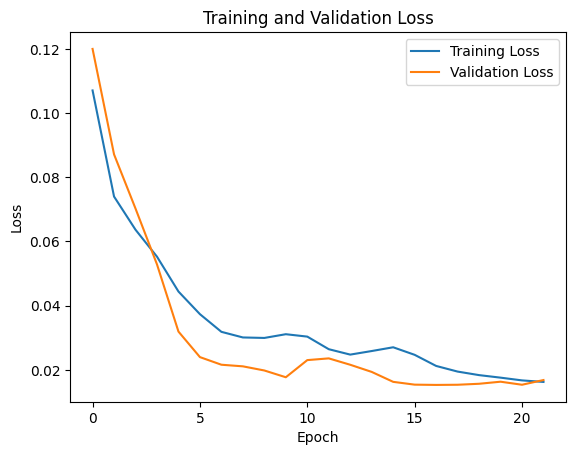

In [ ]:
# 畫圖展示訓練時的Training Loss和Validation Loss
def plot_training_and_validation_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/Jeff/Bidirectional_LSTM__history.png')
    plt.show()

plot_training_and_validation_loss(history)

In [ ]:
# 保存模型
model.save('/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/Jeff/Bidirectional_LSTM.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 預測

In [ ]:
# 載入已保存的模型
model = load_model('/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/Jeff/Bidirectional_LSTM.h5')

In [ ]:
# 預測過去時間點
y_predict = model.predict(X_test)

1/1 [==============================] - 1s 805ms/step


In [ ]:
# 逆轉換獲取實際的銷售數值
y_test = scaler.inverse_transform(y_test)
y_predict = scaler.inverse_transform(y_predict)

In [ ]:
y_test

array([[5.63800800e+06, 3.80109980e+07, 1.14946380e+07, 9.97687000e+05,
        9.05262600e+06, 1.37330977e+08, 9.74480700e+06, 2.90610610e+07,
        7.60333300e+06, 4.01885300e+06, 3.08793830e+07, 3.83267030e+07,
        1.72826650e+07, 2.19362850e+07, 3.28071800e+06, 1.26262600e+07,
        1.54658300e+06, 4.92518600e+06, 5.22198000e+06, 3.20481600e+06,
        6.81496030e+07, 9.37006400e+06, 4.95774000e+05],
       [1.60780530e+07, 1.30813925e+08, 5.02529850e+07, 6.57799600e+06,
        2.94069150e+07, 4.57561260e+08, 3.13350000e+04, 1.07822170e+08,
        2.62578570e+07, 5.27156700e+06, 1.25237457e+08, 1.40143599e+08,
        6.08355720e+07, 7.82413920e+07, 1.72128860e+07, 1.90226170e+07,
        8.47846300e+06, 3.53935380e+07, 2.68811680e+07, 1.24116230e+07,
        1.97609093e+08, 3.53504650e+07, 1.66263200e+06],
       [1.35916500e+06, 1.66037290e+07, 2.19516700e+06, 3.24574000e+05,
        2.20947600e+06, 2.82632030e+07, 2.47900000e+03, 1.83175010e+07,
        3.75978000e+06

In [ ]:
y_predict

array([[ 5.9016610e+06,  2.7728518e+07,  7.6201890e+06,  8.6922444e+05,
         1.8496942e+07,  1.0114350e+08,  6.3727852e+04,  1.2828893e+07,
         5.3981415e+06,  1.7123984e+06,  2.9968836e+07,  6.6272316e+07,
         9.0355540e+06,  9.4363280e+06,  2.3484798e+06,  1.8783176e+07,
         1.5881325e+06,  4.1573632e+06,  4.0282098e+06,  4.1009718e+06,
         5.0821368e+07,  1.3841573e+07,  2.6524622e+05],
       [ 3.1632694e+07,  1.9044616e+08,  2.1108972e+07,  8.2025340e+06,
         3.2837628e+07,  3.7555670e+08,  2.0089253e+05,  1.1671809e+08,
         2.8136580e+07,  1.0681128e+07,  1.4790408e+08,  1.4373555e+08,
         5.4690152e+07,  5.8104084e+07,  1.8110108e+07,  2.0640540e+07,
         1.1161906e+07,  4.1362388e+07,  2.0539734e+07,  1.6169804e+07,
         1.3322852e+08,  4.5726044e+07,  1.9748944e+06],
       [ 7.4014340e+06,  2.6745752e+06,  1.7149389e+06,  8.2147231e+05,
         1.1406219e+06,  3.5007748e+07,  6.8167671e+03,  1.8644230e+07,
         3.9173835e+06

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-01-09 17:52:56--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.101.100, 142.250.101.102, 142.250.101.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2hrqovgurqmhfa3a7ieog64ouot5mf58/1704822750000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=54841ac6-6578-4ff5-83d6-bbca443301e5 [following]
--2024-01-09 17:52:57--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2hrqovgurqmhfa3a7ieog64ouot5mf58/1704822750000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=54841ac6-6578-4ff5-83d6-bbca443301e5
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to d

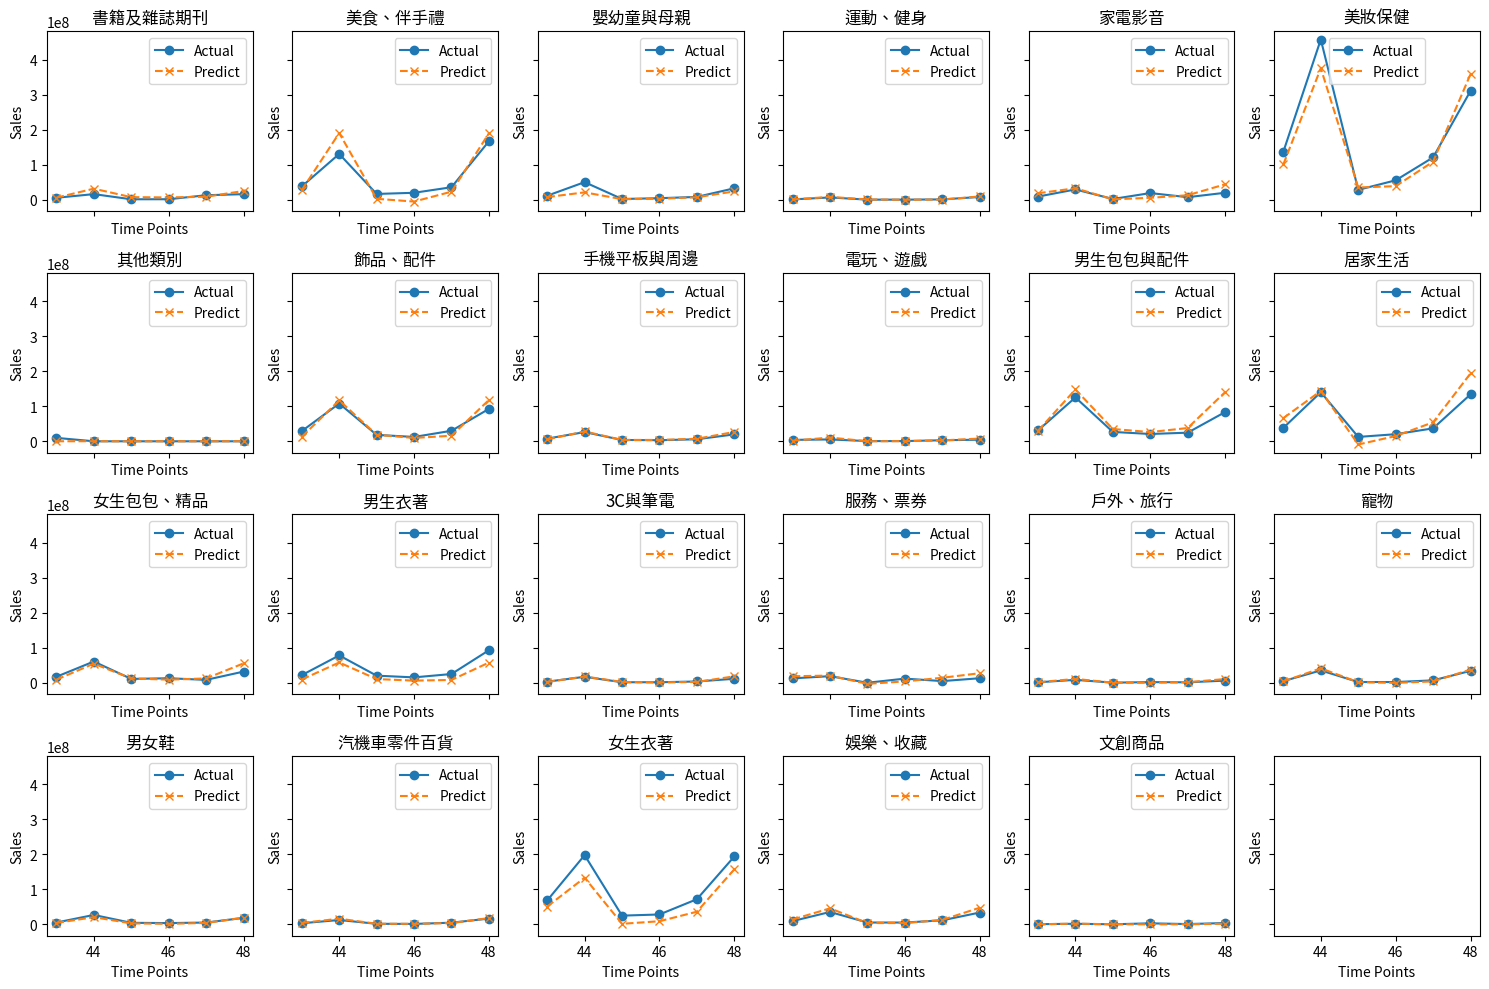

In [ ]:
# 畫圖展示比較y_test和y_predict

time_points = np.arange(test_data['time_points'].values[-y_test.shape[0]], test_data['time_points'].values[-1] + 1) # 43~48

# 繪製 23 張子圖
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    # i 表示第 i+1 個銷售數值
    if i < y_predict.shape[1]:
      ax.plot(time_points, y_test[:, i], label=f'Actual', marker='o')
      ax.plot(time_points, y_predict[:, i], label=f'Predict', linestyle='--', marker='x')
      # ax.set_title(f'Sales_{i + 1}')
      ax.set_title(df.columns[i + 1])
      ax.legend()
    ax.set_xlabel('Time Points')
    ax.set_ylabel('Sales')

# 調整子圖的排列，避免重疊
plt.tight_layout()
plt.savefig(f'/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/Jeff/test_data_predict_result.png')
plt.show()

In [ ]:
# 建立用於預測未來時間點的序列
future_time_steps = 48  # 想要預測的未來時間點
future_x = test_data_categories_scaled[-time_steps:].reshape((1, time_steps, test_data_categories.shape[1]))

# 預測未來時間點的銷售額
future_predictions = []
for i in range(future_time_steps):
    prediction = model.predict(future_x)
    prediction = np.maximum(prediction, 0)
    future_predictions.append(prediction)
    future_x = np.append(future_x[:, 1:, :], prediction.reshape((1, 1, test_data_categories.shape[1])), axis=1)

# 逆轉換獲取實際的銷售數值
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape((future_time_steps, test_data_categories.shape[1])))

1/1 [==============================] - 0s 36ms/step


In [ ]:
# 預測的time_points是range(49, 97)
time_points_array = np.arange(49, 97)

# 合併time_points和future_predictions
predict_result_array = np.column_stack((time_points_array, future_predictions))

print(predict_result_array.shape)
print(predict_result_array)

(48, 24)
[[4.90000000e+01 4.12706000e+06 1.44030350e+07 ... 2.08621520e+07
  6.09466450e+06 2.25087562e+05]
 [5.00000000e+01 4.38165450e+06 1.35921650e+07 ... 2.98810360e+07
  7.17160000e+06 2.18913781e+05]
 [5.10000000e+01 6.28942550e+06 3.38852880e+07 ... 5.11832040e+07
  1.39255390e+07 3.59566188e+05]
 ...
 [9.40000000e+01 3.69208950e+06 1.07698310e+07 ... 2.63912620e+07
  5.58109200e+06 1.77702812e+05]
 [9.50000000e+01 6.04856200e+06 3.40988400e+07 ... 5.12584720e+07
  1.34343120e+07 3.49923156e+05]
 [9.60000000e+01 2.10205100e+07 1.59808576e+08 ... 1.30868784e+08
  3.91364040e+07 1.55568238e+06]]


In [ ]:
# 將result_array加入df中，保留原本df的column名稱
df_predict = pd.concat([df, pd.DataFrame(predict_result_array, columns=df.columns)], ignore_index=True).astype(int)
df_predict

,time_points,書籍及雜誌期刊,美食、伴手禮,嬰幼童與母親,運動、健身,家電影音,美妝保健,其他類別,飾品、配件,手機平板與周邊,...,男生衣著,3C與筆電,服務、票券,戶外、旅行,寵物,男女鞋,汽機車零件百貨,女生衣著,娛樂、收藏,文創商品
0,1,153260,4003524,195038,40629,2697205,4714161,10782,2716677,321704,...,826949,1337692,10292,54889,349938,130607,177813,2353078,380134,1509
1,2,254754,1550611,2040072,899457,1539139,14323238,0,6530340,706898,...,7526794,408633,0,573046,355180,696517,668044,5971670,1310424,9958
2,3,1033464,11988327,2140208,285787,2267156,31478911,4589,5727800,1721200,...,8586338,3248127,112667,451371,2007318,1803472,1556015,10493487,3699819,41341
3,4,3311299,60221655,8228245,1249307,27221491,68702559,1227,17280946,5182561,...,19315684,4781110,743985,2081513,11540588,3319946,3096912,31257470,5378522,152828
4,5,294581,504455,129608,5451,735388,2059604,0,183421,92319,...,58222,1280,3861,1280,56786,3080,66394,210197,10051,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,21057470,160126208,20727886,7761773,38451304,307989568,125843,100807104,22480756,...,51752792,15875895,21782088,8773977,32553526,16367067,15077250,131090128,39206936,1558504
92,93,3176689,12392984,2610267,915829,8038990,37146968,0,15114061,3466408,...,10151736,2430987,2158153,858280,2213093,2713566,1710067,16378715,4931557,180456
93,94,3692089,10769831,3996803,688643,11306922,53275580,18905,11335962,3642596,...,9789972,1813267,7500006,598949,1851466,2445087,2152146,26391262,5581092,177702
94,95,6048562,34098840,7837709,1294955,17954072,106151104,47574,19549030,6384841,...,13706640,3252254,15103211,1866772,5904933,4670977,4129267,51258472,13434312,349923


In [ ]:
# 將DataFrame寫入CSV文件
df_predict.to_csv('/content/drive/Shareddrives/TextMining_Disk/LAB_Folder/Final_project/Jeff/predict_result_Bidirectional_LSTM.csv', index=False)